# 信干噪比性能的仿真

In [1]:
from udntools.region import ServiceRegion 

In [2]:
service_region = ServiceRegion(0, 100,    #x轴
                               0, 100,    #y轴
                               100, 100,  #基站数，用户数
                               if_fix_bs=True) 

In [3]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

TypeError: float() argument must be a string or a number, not 'NoneType'

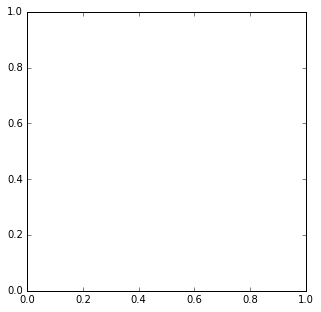

In [4]:
# plt.scatter(service_region.bs_position_[:,0], service_region.bs_position_[:,1])
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
vor = Voronoi(service_region.bs_position_)
voronoi_plot_2d(vor, show_vertices=False, show_points=True, ax=ax)
plt.xlim(service_region.x_min, service_region.x_max)
plt.ylim(service_region.y_min, service_region.y_max)
plt.show()
fig.savefig('bs_station.pdf')
fig.savefig('bs_station.png')

小区的示意图如上图所示，100 x 100大小的区域，100个基站。

In [5]:
import numpy as np

In [6]:
ergodic_ue =  np.reshape(service_region.ground_position_, (-1,2)).T

In [7]:
from udntools.channel import BaseChannel

In [8]:
def e_capacity(alpha, iter):
    channel = BaseChannel(alpha)
    capacity = np.zeros(np.shape(service_region.ground_position_[:,:,0]))
    iter = 100
    for i in range(0,iter):
        sir_one_time = channel.sir_vector(service_region.bs_position_, ergodic_ue)
        capacity_one_time = np.log2(1 + sir_one_time)
        capacity += np.reshape(capacity_one_time,
                               np.shape(service_region.ground_position_[:,:,0]))
    capacity /= iter
    return capacity

In [9]:
capacity_4 = e_capacity(4.0, 100)
capacity_2 = e_capacity(2.0, 100)

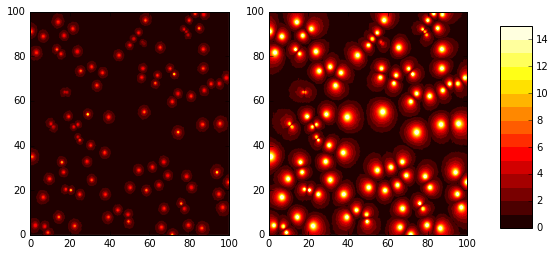

In [10]:
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(121)
im1 = ax.contourf(service_region.ground_position_[:,:,0],
             service_region.ground_position_[:,:,1],
             capacity_2,
             np.linspace(0, 15, 16),
             alpha=1,
             cmap=plt.cm.hot,
             antialiased=True)
for c in im1.collections:
    c.set_edgecolor("face")
'''
vor = Voronoi(service_region.bs_position_)
voronoi_plot_2d(vor,
                show_vertices=False,
                line_colors='orange',
                line_width=2,
                line_alpha=0.6,
                point_size=2,
                ax=ax)
'''
plt.xlim(service_region.x_min, service_region.x_max)
plt.ylim(service_region.y_min, service_region.y_max)
ax = fig.add_subplot(122)
im2 = ax.contourf(service_region.ground_position_[:,:,0],
             service_region.ground_position_[:,:,1],
             capacity_4,
             np.linspace(0, 15, 16),
             alpha=1,
             cmap=plt.cm.hot,
             antialiased=True)
# This is the fix for the white lines between contour levels
for c in im2.collections:
    c.set_edgecolor("face")
'''
vor = Voronoi(service_region.bs_position_)
voronoi_plot_2d(vor,
                show_vertices=False,
                show_points=True,
                line_colors = 'b',
                ax=ax)
'''
plt.xlim(service_region.x_min, service_region.x_max)
plt.ylim(service_region.y_min, service_region.y_max)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1, cax=cbar_ax)
plt.savefig("capacity_hotmap.pdf")   
plt.savefig("capacity_hotmap.png")  
plt.show()